# Earthquake Building Damage Prediction

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


## Load Dataset

In [3]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
df = train_values.merge(train_labels, on="building_id")
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [5]:
df.describe()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.isnull().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

## Target Distribution

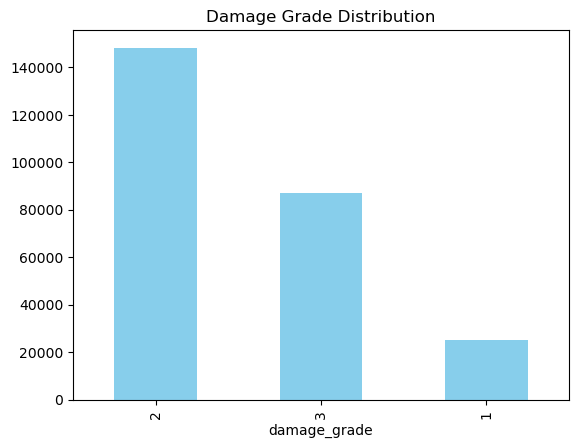

In [13]:
df['damage_grade'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Damage Grade Distribution")
plt.show()


# Numerical Column Histograms

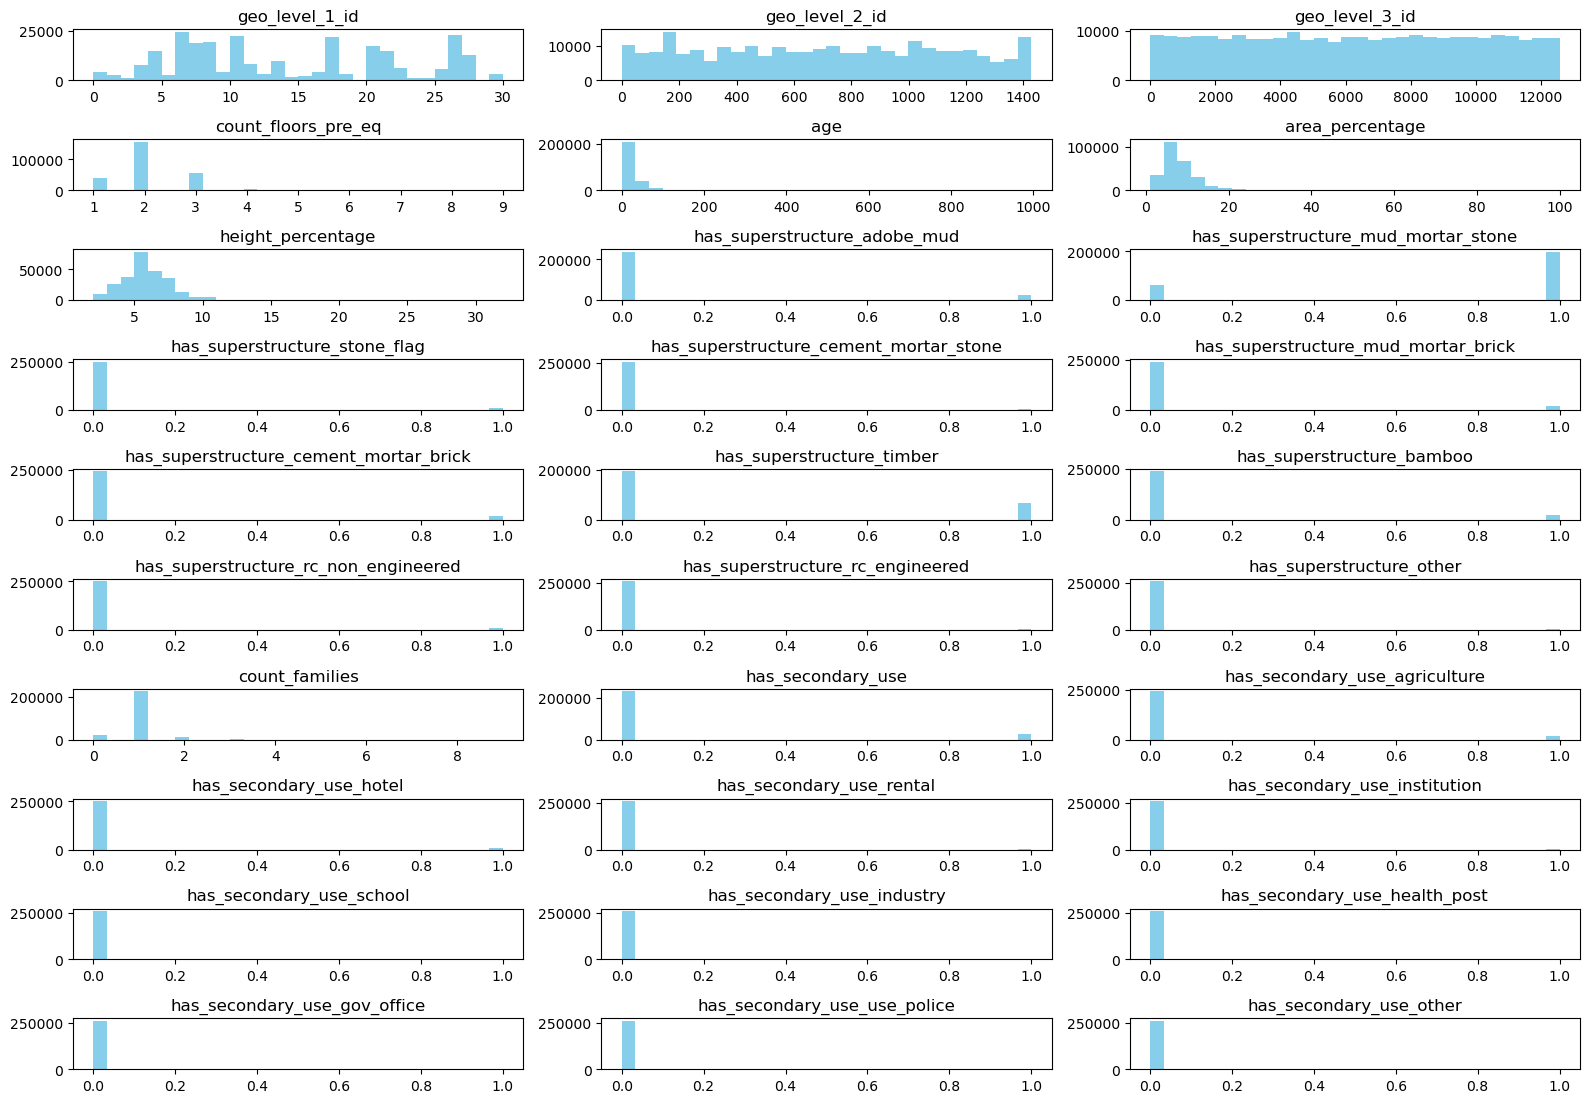

In [15]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('building_id')
num_cols.remove('damage_grade')

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    plt.hist(df[col], bins=30, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


## Categorical Column Distribution

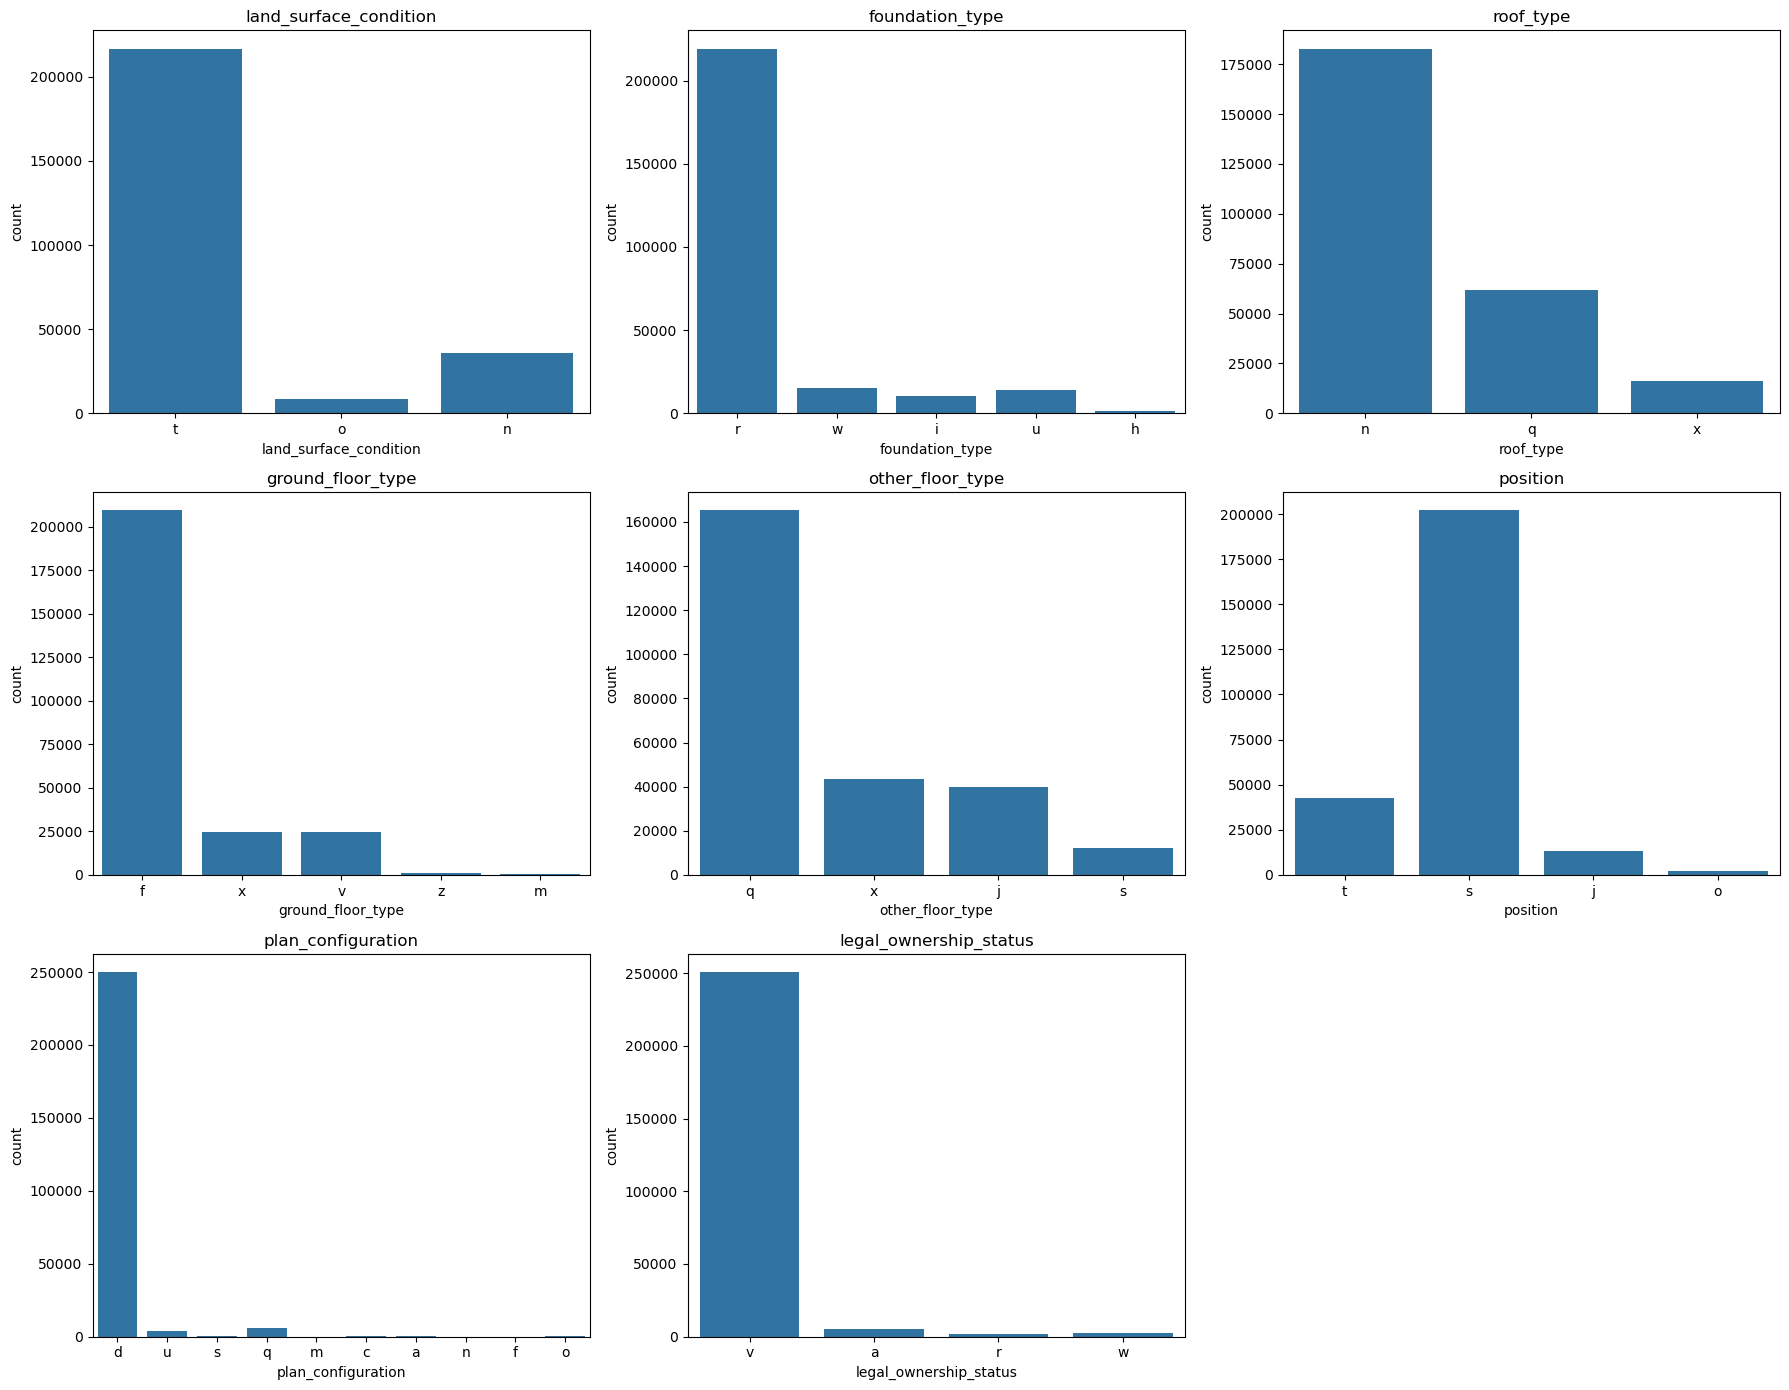

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(18,14))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//3 + 1, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


## Correlation Heatmap

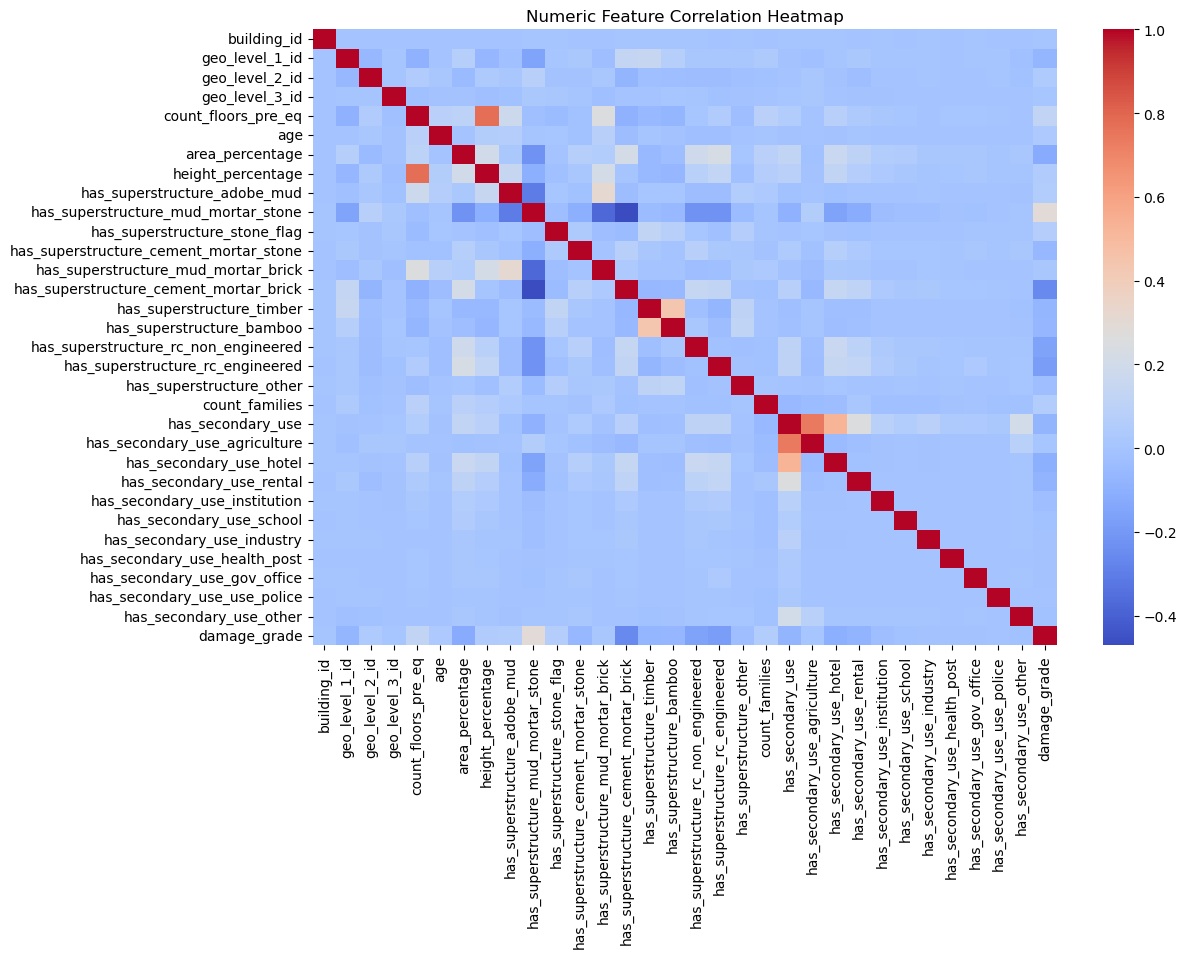

In [20]:
plt.figure(figsize=(12,8))

# Select only numeric columns to avoid string-to-float errors
numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


## Feature & Target Split

In [21]:
X = df.drop(columns=['building_id', 'damage_grade'])
y = df['damage_grade']


## Train/Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


## Preprocessing Pipeline

In [23]:
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])


## RandomForest Model

In [24]:
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', model)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


## Evaluation Metrics

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Cohen’s Kappa:", cohen_kappa_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.718098271330174
Balanced Accuracy: 0.6353416579313264
Cohen’s Kappa: 0.4682517315314356

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.48      0.55      5025
           2       0.72      0.83      0.77     29652
           3       0.72      0.60      0.66     17444

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121



## Confusion Matrix

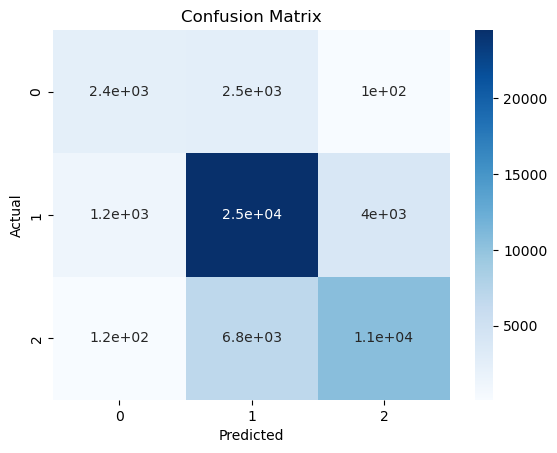

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Feature Importance

In [27]:
forest = pipe.named_steps['clf']
ohe = pipe.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot']
ohe_features = list(ohe.get_feature_names_out(cat_features))

all_features = list(num_features) + ohe_features

importances = forest.feature_importances_
fi = pd.Series(importances, index=all_features).sort_values(ascending=False)

fi.head(30)


geo_level_3_id                            0.153600
geo_level_2_id                            0.135008
geo_level_1_id                            0.133544
age                                       0.123093
area_percentage                           0.112970
height_percentage                         0.055626
count_families                            0.024858
count_floors_pre_eq                       0.016147
foundation_type_r                         0.014055
has_superstructure_mud_mortar_stone       0.013223
has_superstructure_timber                 0.011265
ground_floor_type_v                       0.009724
land_surface_condition_t                  0.009134
land_surface_condition_n                  0.008238
ground_floor_type_f                       0.008042
has_superstructure_adobe_mud              0.007741
position_s                                0.007713
has_superstructure_cement_mortar_brick    0.007571
other_floor_type_q                        0.007419
has_secondary_use              

## Suggestions for Seismologists

#### Seismologist Recommendations Based on Data & Model Insights

- Retrofit Old Buildings    
 Damage increases significantly with building age.    

- Use Engineered Reinforced Concrete    
 RC-engineered structures show lowest destruction levels.    
       
- Regulate Weak Materials  
   Mud, bamboo, adobe → highest failure risk.   

- Improve Foundations     
   Stronger foundation types reduce collapse probability.

- Limit Floors in High-Risk Zones    
   More height → more vulnerability.

- Geo-Zone Risk Mapping   
   Geo levels strongly influence expected damage.

- Strengthen Buildings with Secondary Use    
   Especially schools, hospitals, hotels.